In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the data
reviews_df = pd.read_csv('amazon_reviews.csv')
reviews_df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [19]:
reviews_df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [14]:
reviews_df = reviews_df.dropna()
reviews_df.isna().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [15]:
reviews_df.drop(['date'],axis=1)

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1
...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,Black Dot,"Listening to music, searching locations, check...",1
3147,5,Black Dot,"I do love these things, i have them running my...",1
3148,5,White Dot,Only complaint I have is that the sound qualit...,1


<Axes: >

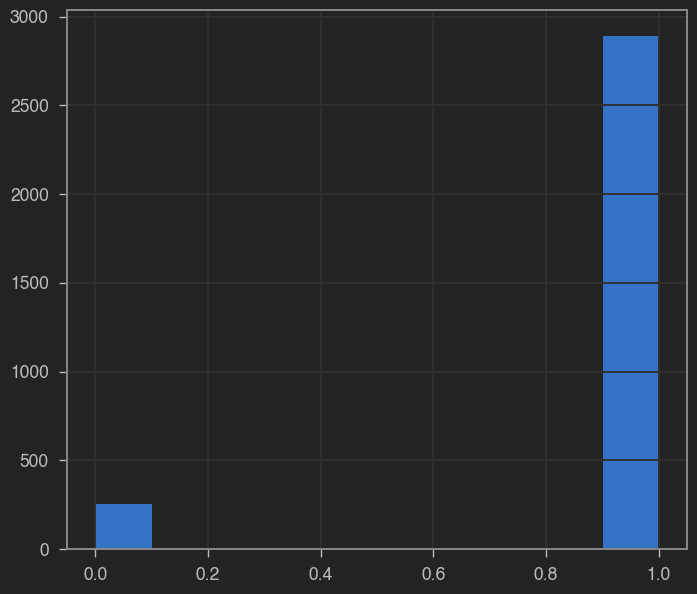

In [16]:
reviews_df['feedback'].hist()

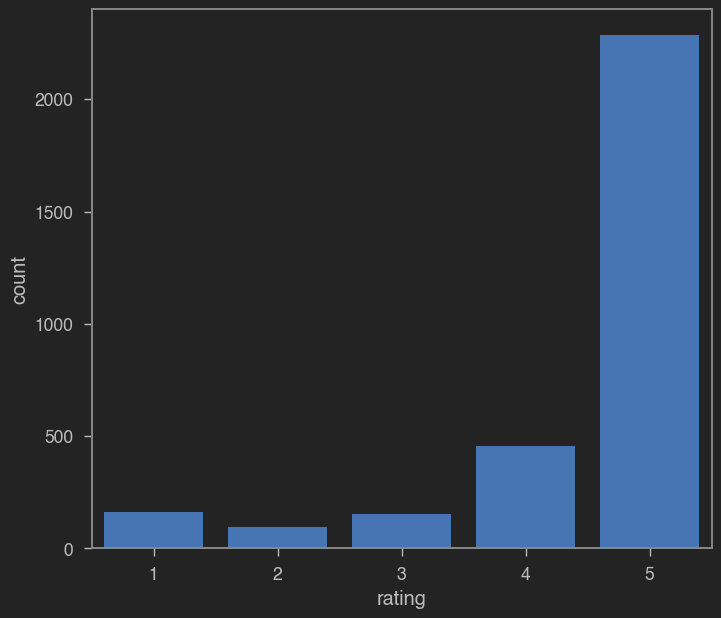

In [20]:
sns.countplot(x='rating', data=reviews_df)
plt.show()

In [23]:
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df.head()

/var/folders/59/04rfykkd6m96gklk1909pqyh0000gn/T/ipykernel_25084/4100225453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['length'] = reviews_df['verified_reviews'].apply(len)


,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<Axes: >

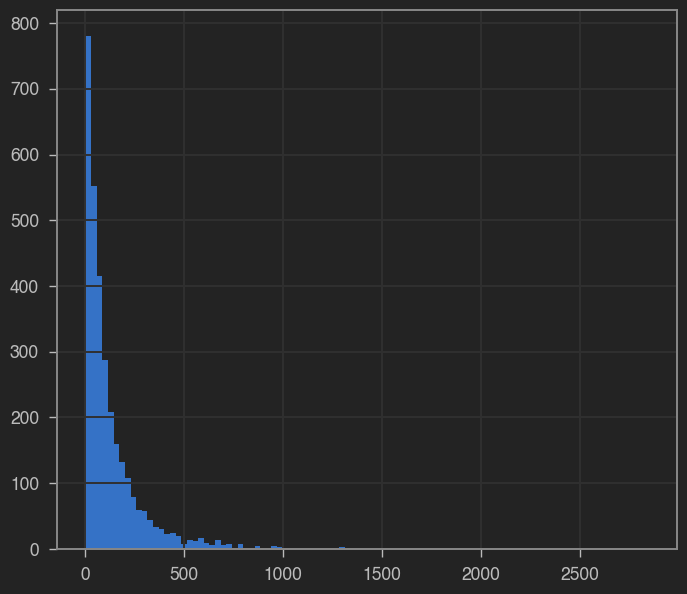

In [26]:
reviews_df['length'].hist(bins=100)

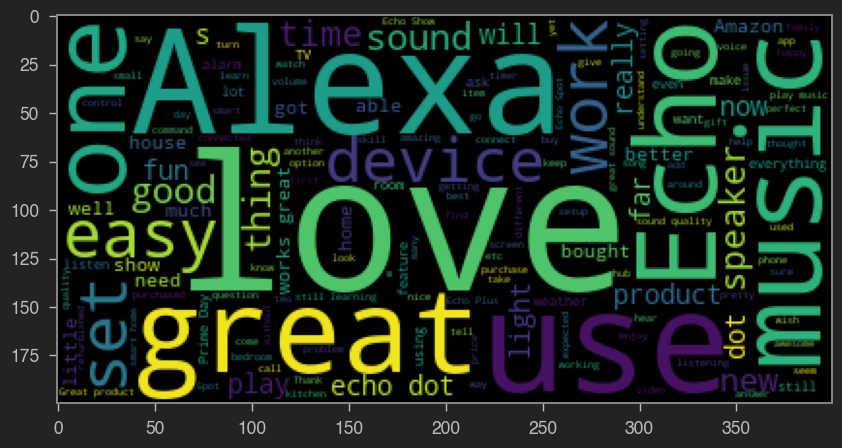

In [29]:
from wordcloud import WordCloud
positive = reviews_df[reviews_df['feedback'] == 1]
negative = reviews_df[reviews_df['feedback'] == 0]

positive_list = positive['verified_reviews'].to_list()
positive_joined = ''.join(positive_list)

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(positive_joined))

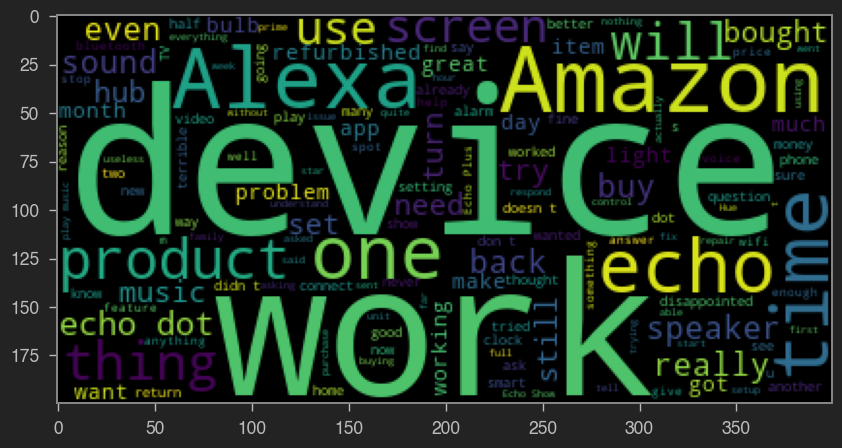

In [30]:
negative_list = negative['verified_reviews'].to_list()
negative_sentence = ''.join(negative_list)

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(negative_sentence))

In [33]:
import string 
string.punctuation
import nltk 
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords

def sentence_cleaning(text):
    punc_removed = [char for char in text if char not in string.punctuation]
    punc_removed_list = ''.join(punc_removed)
    remove_stopwords = [word for word in punc_removed_list.split() if word.lower() not in stopwords.words('english')]
    return remove_stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kensukeumakoshi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer=sentence_cleaning)
x = vectorizer.fit_transform(reviews_df['verified_reviews'])
X = pd.DataFrame(x.toarray())

In [48]:
y = reviews_df['feedback']

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### MultinomialNB

In [69]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
NB = MultinomialNB()
NB.fit(X_train, y_train)
# Predicting the Test set results
y_predict_test = NB.predict(X_test)
print(classification_report(y_test, y_predict_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.70      0.46      0.55        61
           1       0.94      0.98      0.96       569

    accuracy                           0.93       630
   macro avg       0.82      0.72      0.76       630
weighted avg       0.92      0.93      0.92       630

Confusion Matrix:
 [[ 28  33]
 [ 12 557]]


### RandomForestClassifier

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=70, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Confusion Matrix:
 [[ 17  44]
 [  2 567]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.28      0.42        61
           1       0.93      1.00      0.96       569

    accuracy                           0.93       630
   macro avg       0.91      0.64      0.69       630
weighted avg       0.92      0.93      0.91       630



### LogisticRegression

In [73]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Confusion Matrix:
 [[ 17  44]
 [  2 567]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.28      0.42        61
           1       0.93      1.00      0.96       569

    accuracy                           0.93       630
   macro avg       0.91      0.64      0.69       630
weighted avg       0.92      0.93      0.91       630



### GridSearchCV

In [76]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.1,0.2,0.3, 0.4, 0.5,0.7, 1.0]} 
grid_search = GridSearchCV(MultinomialNB(), params, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.62      0.64        61
           1       0.96      0.96      0.96       569

    accuracy                           0.93       630
   macro avg       0.81      0.79      0.80       630
weighted avg       0.93      0.93      0.93       630

Confusion Matrix:
 [[ 38  23]
 [ 20 549]]
